In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = pd.read_csv("iris.csv")

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris.drop('species', axis=1)

In [4]:
y = iris['species']

In [5]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

In [7]:
y = encoder.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=101)

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
scaled_X_train = scaler.transform(X_train)

In [12]:
scaled_X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(units = 4, activation = 'relu', input_shape=[4,]))
model.add(Dense(units = 3, activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stop = EarlyStopping(patience=10)

In [17]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data = (scaled_X_test, y_test),
         callbacks=[early_stop])

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 1s 5ms/sample - loss: 1.3183 - accuracy: 0.0000e+00 - val_loss: 1.3585 - val_accuracy: 0.0000e+00
Epoch 2/300
120/120 [==============================] - 0s 158us/sample - loss: 1.3098 - accuracy: 0.0000e+00 - val_loss: 1.3502 - val_accuracy: 0.0000e+00
Epoch 3/300
120/120 [==============================] - 0s 125us/sample - loss: 1.3007 - accuracy: 0.0000e+00 - val_loss: 1.3419 - val_accuracy: 0.0000e+00
Epoch 4/300
120/120 [==============================] - 0s 125us/sample - loss: 1.2922 - accuracy: 0.0000e+00 - val_loss: 1.3336 - val_accuracy: 0.0000e+00
Epoch 5/300
120/120 [==============================] - 0s 116us/sample - loss: 1.2838 - accuracy: 0.0000e+00 - val_loss: 1.3256 - val_accuracy: 0.0000e+00
Epoch 6/300
120/120 [==============================] - 0s 125us/sample - loss: 1.2758 - accuracy: 0.0000e+00 - val_loss: 1.3176 - val_accuracy: 0.0000e+00
Epoch 7/300
120/120 [======

In [18]:
metrics = pd.DataFrame(model.history.history)

In [20]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.318301,0.000000,1.358546,0.0
1,1.309765,0.000000,1.350232,0.0
2,1.300686,0.000000,1.341859,0.0
3,1.292231,0.000000,1.333643,0.0
4,1.283776,0.000000,1.325593,0.0
...,...,...,...,...
295,0.592562,0.800000,0.645972,0.8
296,0.591341,0.808333,0.644417,0.8
297,0.590016,0.808333,0.642986,0.8
298,0.588780,0.808333,0.641560,0.8


In [21]:
accuracy = metrics[['val_accuracy','accuracy']]
losses = metrics[['loss','val_loss']]

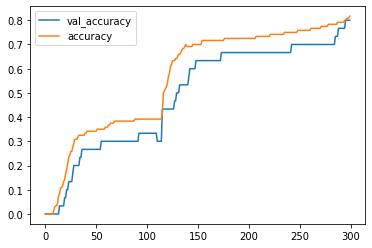

In [22]:
accuracy.plot()

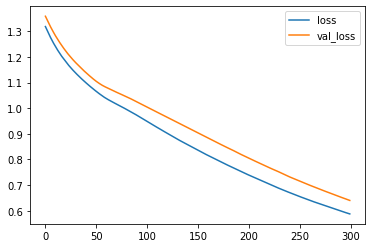

In [23]:
losses.plot()

In [24]:
model.evaluate(scaled_X_test, y_test, verbose=0)

[0.6401190161705017, 0.8]

In [25]:
epochs = len(metrics)

In [29]:
scaled_X = scaler.fit_transform(X)

In [30]:
model = Sequential()
model.add(Dense(units = 4, activation = 'relu', input_shape=[4,]))
model.add(Dense(units = 3, activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
model.fit(scaled_X,y,epochs=epochs)

Train on 150 samples
Epoch 1/300
150/150 [==============================] - 0s 2ms/sample - loss: 1.1081 - accuracy: 0.3200
Epoch 2/300
150/150 [==============================] - 0s 80us/sample - loss: 1.1062 - accuracy: 0.3267
Epoch 3/300
150/150 [==============================] - 0s 80us/sample - loss: 1.1043 - accuracy: 0.3467
Epoch 4/300
150/150 [==============================] - 0s 73us/sample - loss: 1.1025 - accuracy: 0.3333
Epoch 5/300
150/150 [==============================] - 0s 73us/sample - loss: 1.1006 - accuracy: 0.3333
Epoch 6/300
150/150 [==============================] - 0s 80us/sample - loss: 1.0988 - accuracy: 0.3400
Epoch 7/300
150/150 [==============================] - 0s 73us/sample - loss: 1.0971 - accuracy: 0.3333
Epoch 8/300
150/150 [==============================] - 0s 80us/sample - loss: 1.0954 - accuracy: 0.3333
Epoch 9/300
150/150 [==============================] - 0s 80us/sample - loss: 1.0937 - accuracy: 0.3333
Epoch 10/300
150/150 [======================

In [32]:
model.save("final_iris_model.h5")

In [33]:
import joblib

In [34]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

In [35]:
from tensorflow.keras.models import load_model

In [36]:
flower_model = load_model('final_iris_model.h5')

In [37]:
flower_scaler = joblib.load('iris_scaler.pkl')

In [38]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [39]:
flower_example = {"sepal_length":5.1,
                 "sepal_width":3.5,
                 "petal_length":1.4,
                 "petal_width":0.2}

In [40]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
def return_predictions(model, scaler, sample_json):
    
    
    s_len = sample_json["sepal_length"]
    s_wid = sample_json["sepal_width"]
    p_len = sample_json["petal_width"]
    p_wid = sample_json["petal_width"]
    
    flower = [[s_len, s_wid, p_len, p_wid]]
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    flower = scaler.transform(flower)
    
    class_ind = model.predict_classes(flower)[0]
    
    return classes[class_ind]

In [44]:
return_predictions(flower_model, flower_scaler, flower_example)

'setosa'

# Code for Deployment

In [ ]:
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]